# [IAFlash](https://entrepreneur-interet-general.etalab.gouv.fr/defis/2019/iaflash.html) simple exploration

## Data cleaning

Will work on the [Stanford Cars Dataset](http://ai.stanford.edu/~jkrause/cars/car_dataset.html). The data must be downloaded and present in the `pathToDataDir` directory.

### Imports

In [1]:
import os
HOME = os.path.expanduser('~/')
HOST = os.uname()[1]
if HOST == 'Arthurs-MacBook-Pro.local':
    os.chdir(os.path.join(HOME, 'Documents/GitHub/EIG3_IAFlash/'))    # @home
else:
    raise ValueError('unknown host: {}'.format(HOST))
    
import numpy as np
# import pandas as pd
import time
import pickle

from PIL import Image, ImageOps, ImageFilter

import matplotlib.pyplot as plt
%matplotlib inline

from IAFlash.helpers import DataHandler, ImageWorker # needs correct working directory

### Variables

In [2]:
# data
if HOST == 'Arthurs-MacBook-Pro.local':
    pathToDataDir = os.path.join(HOME, 'Documents/Dropbox/Transit/EIG3_IAFlash/')
else:
    raise ValueError('unknown host: {}'.format(HOST))
    
ptValidationInTest = 0.2
dh = DataHandler(pathToDataDir, ptValidationInTest)

# image processing
edge = 2**7
bw = True
resampleFilter = Image.NEAREST

# seed
seed = 8
np.random.seed(seed)

### Data manipulations

Read raw images, cast each of them to a basic formatted instance, and save them with a directory structure that will help using the `keras.preprocessing.image.ImageDataGenerator`.

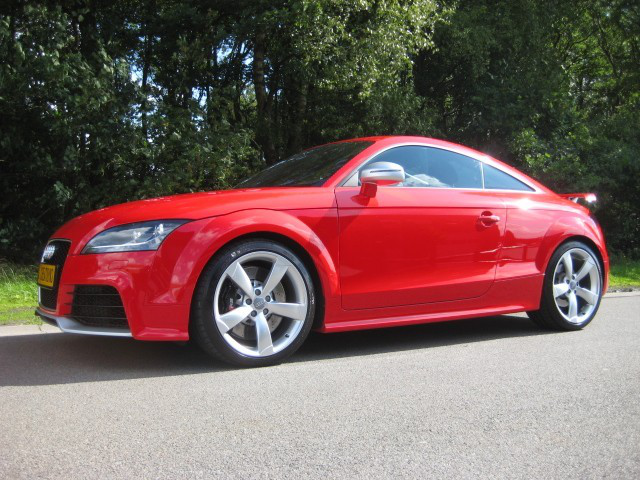

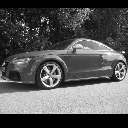

In [7]:
# example of basic formatting
i = np.random.choice(dh.n,1)[0]
iw = ImageWorker(dh,i)
iw.buildPatch(edge=edge, bw=bw, resampleFilter=resampleFilter)
display(iw.image)
display(iw.patch)

In [ ]:
# full dataset
tic = time.time()
for i in range(dh.n):

    # load image, create patch, and save
    iw = ImageWorker(dh,i)
    iw.buildPatch(edge=edge, bw=bw, resampleFilter=resampleFilter)  
    iw.savePatch()
    
print('done: took {}s'.format(np.round(time.time()-tic,2)))